# BlackJack (Q Learning)
In this notebook, we will try to find a silution for the BlackJack using the QLearning algorithm.

In [1]:
import gym
import numpy as np
import random
import imageio 
from matplotlib import pyplot as plt

## Context

In [2]:
env = gym.make("Blackjack-v1", natural=False, sab=False)

The BlackJack problem is kind of unique, not like the other that use the Qlearning algorithm : the randomness.
Here, we have 2 possible actions : stay or take a new card, encoded as 'int' between 0 and 1.

In [3]:
env.action_space.n

2

The observation space contains 3 things : the player's current sum (an 'int' between 0 and 31), the value of dealer's hand ('int' between 1 and 10) and whether the player holds a usable ace ('int' between 0 or 1).

Here the number of possible states begins to be big, because each combinations create a new state, a new situation.

In [5]:
player_sum, dealer_card, usable_ace = env.observation_space
player_sum

Discrete(32)

As a result, it creates a QTable with 32x11x2x2 dimensions.

In [6]:
qtable = np.zeros((player_sum.n, dealer_card.n, usable_ace.n, env.action_space.n))
qtable.shape

(32, 11, 2, 2)

Before applying the learning algorithm, there will be something else that change. In other case where we use QLearning, the metrics to follow the alog's progressions were : the number of step or the reward. In the blackjack, what matter most is not in how many turn we can win, but the fact to win. 

So here, to monitor the algorithm learning progress, we will store the number of times where the algorithms wins through the episodes.

In [20]:
achieve_steps = [0]

In [8]:
qtable.shape

(32, 11, 2, 2)

## QLearning Algorithm

We now want to make the computer learn the situation by using the algorithm of qlearning.


For a given number of episodes, we want the computer to win over the dealer, if the computer manage then it gets rewarded.
To penalize its ineffectiveness and its mistakes, the algorithm reward -1 when the player lose a game, and 0 if the game is a tie.

For a given number of maximum steps (max number of action to take in order to complete the task). Either we explore or the take the best action given by the Qtable, take the action given and update the Qtable with the action and the new state.

In [21]:
def QLearning(env, learning, discount, epsilon, max_steps, episodes):
    

    for i in range(episodes):
        print("Episodes n°:", i)
        state, info = env.reset()

        player_sum, dealer_card, usable_ace = state[0], state[1], int(state[2])
        
        done = False
        decay_rate= 0.005


        achieve_steps.append(achieve_steps[-1])

        for j in range(max_steps):
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(qtable[player_sum, dealer_card, usable_ace, :])

            new_state, reward, done, truncated, info = env.step(action)

            new_player_sum, new_dealer_card, new_usable_ace = new_state[0], new_state[1], int(new_state[2])
            
            qtable[player_sum, dealer_card, usable_ace, action] = qtable[player_sum, dealer_card, usable_ace, action] + learning * (reward + discount * np.max(qtable[new_player_sum, new_dealer_card, new_usable_ace, :])-qtable[player_sum, dealer_card, usable_ace, action])

            state = new_state

            if reward >= 1:
                achieve_steps[-1] += 1

            if done == True:
                break

        epsilon = np.exp(-decay_rate*i)


## Learning time!

In [22]:
QLearning(env, 
          learning=0.9, 
          discount=0.99, 
          epsilon=1.0, 
          max_steps=200, 
          episodes=200000)

Episodes n°: 0
Episodes n°: 1
Episodes n°: 2
Episodes n°: 3
Episodes n°: 4
Episodes n°: 5
Episodes n°: 6
Episodes n°: 7
Episodes n°: 8
Episodes n°: 9
Episodes n°: 10
Episodes n°: 11
Episodes n°: 12
Episodes n°: 13
Episodes n°: 14
Episodes n°: 15
Episodes n°: 16
Episodes n°: 17
Episodes n°: 18
Episodes n°: 19
Episodes n°: 20
Episodes n°: 21
Episodes n°: 22
Episodes n°: 23
Episodes n°: 24
Episodes n°: 25
Episodes n°: 26
Episodes n°: 27
Episodes n°: 28
Episodes n°: 29
Episodes n°: 30
Episodes n°: 31
Episodes n°: 32
Episodes n°: 33
Episodes n°: 34
Episodes n°: 35
Episodes n°: 36
Episodes n°: 37
Episodes n°: 38
Episodes n°: 39
Episodes n°: 40
Episodes n°: 41
Episodes n°: 42
Episodes n°: 43
Episodes n°: 44
Episodes n°: 45
Episodes n°: 46
Episodes n°: 47
Episodes n°: 48
Episodes n°: 49
Episodes n°: 50
Episodes n°: 51
Episodes n°: 52
Episodes n°: 53
Episodes n°: 54
Episodes n°: 55
Episodes n°: 56
Episodes n°: 57
Episodes n°: 58
Episodes n°: 59
Episodes n°: 60
Episodes n°: 61
Episodes n°: 62
Ep

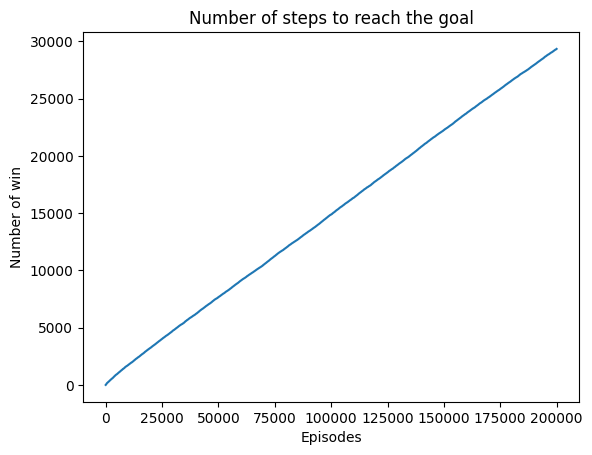

In [24]:
plt.plot(achieve_steps)
plt.title('Number of steps to reach the goal')
plt.xlabel('Episodes')
plt.ylabel('Number of win')
plt.show()

So what to look with this plot ?

Through all the episodes, we can see how many times the alogirthm win over the dealer. This plot isn't good why ? Because the number of wins increase linearly as the time goes by, it seems that the algorithm doesn't learn well otherwise there'd be a moment the win number increase way more instrad of slowly.


But it is normal, you know why ? Randomness

As said earlier, the BlackJack task is quite different from the other as it implied randomness. For example, when the player has a 10 and a 5 after hitting a first time, with such a number the dealer can win or not, it depends on the next card, the same goes for the player that could hit once more, even if its more likely to hit a card higher than 6 there's still a probability to win. Because we don't know how the card are distributed, we can't anticipate the action, and the algorithm is in the same situation. If the algorithm could win most of the time, then casino would be in bankrupt.


In [25]:
print("Win rate : ",achieve_steps[-1] / 100000)

Win rate :  0.29339


Despite being quite low, winning 1/3 of the time against randomness is quite good, but achieving higher number will most likely result of luck and odds with the player.

## Creating the GIF

In [27]:
import time
images = []



for game in range(10):
    env = gym.make("Blackjack-v1", natural=False, sab=False, render_mode="rgb_array")
    state,info = env.reset()

    player_sum, dealer_card, usable_ace = state[0], state[1], int(state[2])


    while 1>0:

        action = np.argmax(qtable[player_sum, dealer_card, usable_ace,:])
        new_state, reward, done, trunc, info = env.step(action)
        frame = env.render()

        for i in range(40):
            images.append(frame)

        player_sum, dealer_card, usable_ace = new_state[0], new_state[1], int(new_state[2])

        if done == True:
            break

env.close()
imageio.mimsave('img/BlackJack16.gif', images, fps=59)